## App - Wildcam animals Classifier

Diese App bietet dir die Möglichkeit, deine Aufnahmen der Wildcamera hochzuladen damit diese mitteilt, um welche Art von Tier es sich auf dem Bild handelt.
Somit kannst du ganz einfach am nächsten Stammtisch deine Wildcamera-Fotos auspacken und direkt angeben um welches Tier es sich handelt ohne ein Tierprofi zu sein!

In [61]:
!pip install -Uqq fastai
from fastai.vision.all import *
from fastai.vision.widgets import *

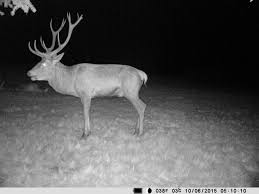

In [69]:
download_url('https://github.com/christophTo/PDS-Project/releases/download/models/iwildcam2020_train_annotations.json', 'data.json')
with open(r'data.json') as json_file:
    train_data = json.load(json_file)
train_categories = train_data['categories']
download_url('https://github.com/christophTo/PDS-Project/releases/download/models/standardClassification.pkl', 'standard_classifier.pkl')
learn_inf = load_learner('standard_classifier.pkl', cpu=True)
btn_upload = widgets.FileUpload()
btn_upload.style.button_color = 'lightblue'
btn_run = widgets.Button(description='Classify')
btn_run.style.button_color = 'lightblue'
out_pl = widgets.Output()
lbl_pred = widgets.Label(value = "")
lbl_predOne = widgets.Label()
lbl_predTwo = widgets.Label()
lbl_predThree = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512,512))
    pred,pred_idx,probs = learn_inf.predict(img)
    name = "not found in data..."
    value = int(pred)
    for item in train_categories:
        if value == item['id']:
            name = item['name']
    lbl_predOne.value = f'Klasse: {pred}'
    lbl_predTwo.value = f'Genauigkeit: {probs[pred_idx]:.04f}'
    lbl_predThree.value = f'Erkannte Tierart: {name}'
    lbl_pred.value = f"Results:"

btn_run.on_click(on_click_classify)
left_box = VBox([widgets.Label('Lade ein Wildcamera-Foto hoch!'),btn_upload, btn_run, out_pl])
right_box = VBox([lbl_pred, lbl_predOne, lbl_predTwo, lbl_predThree])
HBox([left_box, right_box])